  0%|          | 0/1148 [00:00<?, ?it/s]

  0%|          | 0/1092 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27535 entries, 2019-09-08 17:00:00 to 2022-10-29 23:00:00
Freq: 3600S
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               27535 non-null  float64
 1   high               27535 non-null  float64
 2   low                27535 non-null  float64
 3   close              27534 non-null  float64
 4   buy_trade_count    27535 non-null  int64  
 5   sell_trade_count   27535 non-null  int64  
 6   quote_buy_volume   27535 non-null  float64
 7   quote_sell_volume  27535 non-null  float64
 8   close_7dayma       27367 non-null  float64
 9   close_1dayma       27511 non-null  float64
 10  1dayatr            27510 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18869760 entries, 2019-09-13 00:00:00 to 2022-10-29 23:59:55
Data columns (total 11 columns):
 #   Column       

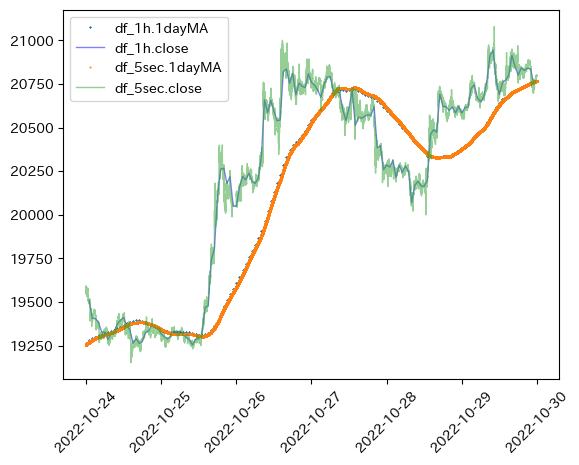

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import exercise_util
import talib

df_1h = exercise_util.concat_timebar_files('BTCUSDT', 3600)
df_5sec = exercise_util.concat_timebar_files('BTCUSDT', 5)

df_1h['close'] = df_1h['close'].shift(1)
df_5sec['close'] = df_5sec['close'].shift(1)

df_1h['close_7dayma'] = df_1h['close'].rolling(7 * 24).mean()
df_1h['close_1dayma'] = df_1h['close'].rolling(24).mean()
df_5sec['close_7dayma'] = df_5sec['close'].rolling(7 * 24 * 60 * 60 // 5).mean()
df_5sec['close_1dayma'] = df_5sec['close'].rolling(24 * 60 * 60 // 5).mean()

df_1h['1dayatr'] = talib.ATR(df_1h['high'], df_1h['low'], df_1h['close'], timeperiod = 24)
df_5sec['1dayatr'] = talib.ATR(df_5sec['high'], df_5sec['low'], df_5sec['close'], timeperiod = 24 * 60 * 60 // 5)

print(df_1h.info())
print(df_5sec.info())

plt.plot(df_1h.loc[df_1h.index > '2022-10-24', 'close_1dayma'], label = 'df_1h.1dayMA', linewidth = 0, marker = 'x', markersize = 1)
#plt.plot(df_1h.loc[df_1h.index > '2022-10-24', 'close_7dayma'], label = 'df_1h.7dayMA', linewidth = 0, marker = 'x', markersize = 1)
plt.plot(df_1h.loc[df_1h.index > '2022-10-24', 'close'], label = 'df_1h.close', linewidth = 1, alpha = 0.5, color = 'blue')
plt.plot(df_5sec.loc[df_5sec.index > '2022-10-24', 'close_1dayma'], label = 'df_5sec.1dayMA', linewidth = 0, marker = '.', markersize = 1)
#plt.plot(df_5sec.loc[df_5sec.index > '2022-10-24', 'close_7dayma'], label = 'df_5sec.7dayMA', linewidth = 0, marker = '.', markersize = 1)
plt.plot(df_5sec.loc[df_5sec.index > '2022-10-24', 'close'], label = 'df_5sec.close', linewidth = 1, alpha = 0.5)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

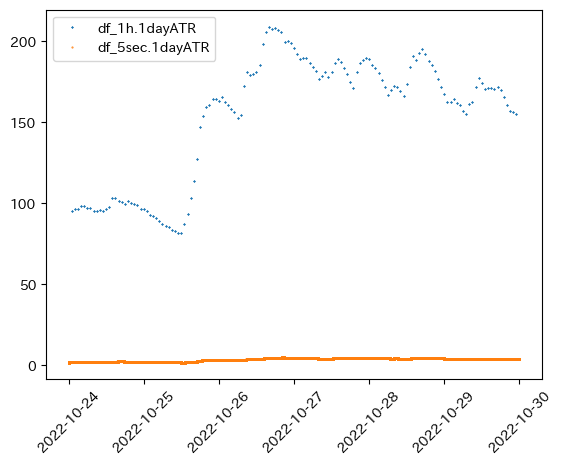

In [16]:
plt.plot(df_1h.loc[df_1h.index > '2022-10-24', '1dayatr'], label = 'df_1h.1dayATR', linewidth = 0, marker = 'x', markersize = 1)
plt.plot(df_5sec.loc[df_5sec.index > '2022-10-24', '1dayatr'], label = 'df_5sec.1dayATR', linewidth = 0, marker = '.', markersize = 1)
plt.xticks(rotation = 45)
plt.legend()
plt.show()